<a href="https://colab.research.google.com/github/DocBot-Bangkit-2021/DocBot-MachineLearningModels/blob/main/FruitsVegetables/FruitsVegetables_Baseline_Model_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns

import os
import zipfile
import shutil
from glob import glob

from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D

In [ ]:
plt.style.use('seaborn')

# **Data Loading**

[Fruits-262](https://www.kaggle.com/aelchimminut/fruits262)

[Fresh and Stale Images of Fruits and Vegetables](https://www.kaggle.com/raghavrpotdar/fresh-and-stale-images-of-fruits-and-vegetables?select=fresh_apple)

[Tomato Cultivars](https://www.kaggle.com/olgabelitskaya/tomato-cultivars?select=01_019.png)

[Fruits 360](https://www.kaggle.com/moltean/fruits)

[Fruits & Vegetables](https://www.kaggle.com/jorgebailon/fruits-vegetables)

[fruits_vegetables_photos](https://www.kaggle.com/balalexv/fruits-vegetables-photos?select=TRAIN)

This dataset contains image data of fruits and vegetables. With six classes namely:

* `Banana`  :  3070 images
* `Apple`  :  3352 images
* `Orange`  :  2977 images
* `Tomato`  :  442 images
* `Broccoli`  :  315 images
* `Carrot`  :  1001 images

**Link for dataset in Google Drive**

https://drive.google.com/file/d/1ruaStccmRUdgpxlI5lD2LDWH9nxoc9VY/view?usp=sharing

https://www.kaggle.com/nurimammasri/fruitsvegetables

In [ ]:
# Use this to download easily (only on google colab)
# !gdown --id 1ruaStccmRUdgpxlI5lD2LDWH9nxoc9VY

**Download dataset in Google Drive**

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1ruaStccmRUdgpxlI5lD2LDWH9nxoc9VY/view?usp=sharing' # The shareable link

In [ ]:
# fluff, id = link.split('d/')
id = link.split('d/')[1].split('/view?')[0]
print (id)

1ruaStccmRUdgpxlI5lD2LDWH9nxoc9VY


In [ ]:
downloaded = drive.CreateFile({'id':id})  #drive from PyDrive
downloaded.GetContentFile('fruitsvegetables.zip')  

In [ ]:
file_zip = 'fruitsvegetables.zip'
zip_ref = zipfile.ZipFile(file_zip, 'r')
zip_ref.extractall('./fruitsvegetables/')
zip_ref.close()

In [ ]:
dir = './fruitsvegetables/'
list_category = sorted(os.listdir(dir))
list_category

['apple', 'banana', 'broccoli', 'carrot', 'orange', 'tomato']

# **Data Arrange**

In [ ]:
# check a lot of data for :
# {'apple': 0, 'banana': 1, 'broccoli': 2, 'carrot': 3, 'orange': 4, 'tomato': 5}
apple_dir = os.path.join(dir,'apple')
banana_dir = os.path.join(dir, 'banana')
broccoli_dir = os.path.join(dir, 'broccoli')
carrot_dir = os.path.join(dir,'carrot')
orange_dir = os.path.join(dir, 'orange')
tomato_dir = os.path.join(dir, 'tomato')

print("Apple :", len(os.listdir(apple_dir)))
print("Banana :", len(os.listdir(banana_dir))) 
print("Broccoli :", len(os.listdir(broccoli_dir)))
print("Carrot :", len(os.listdir(carrot_dir)))
print("Orange :", len(os.listdir(orange_dir))) 
print("Tomato :", len(os.listdir(tomato_dir)))

Apple : 3352
Banana : 3070
Broccoli : 315
Carrot : 1001
Orange : 2977
Tomato : 442


In [ ]:
def is_image(dir, filename, verbose=False):
    name = os.path.join(dir, filename)

    data = open(name,'rb').read(10)

    # check if file is JPG or JPEG
    if data[:3] == b'\xff\xd8\xff':
        if verbose == True:
             print(filename+" is: JPG/JPEG.")
        return True

    # check if file is PNG
    if data[:8] == b'\x89\x50\x4e\x47\x0d\x0a\x1a\x0a':
        if verbose == True:
             print(filename+" is: PNG.")
        return True

    # check if file is GIF
    if data[:6] in [b'\x47\x49\x46\x38\x37\x61', b'\x47\x49\x46\x38\x39\x61']:
        if verbose == True:
             print(filename+" is: GIF.")
        return True

    return False

import os

category_sets = [apple_dir, banana_dir, broccoli_dir, carrot_dir, orange_dir, tomato_dir]

# go through all files in desired folder
for image_dir in category_sets:
  for filename in os.listdir(image_dir):
     # check if file is actually an image file
     if is_image(image_dir, filename, verbose=False) == False:
          # if the file is not valid, remove it
          os.remove(os.path.join(image_dir, filename))

Make dataframe with `image` as feature and `target` as target. 
* `image` will be the image's path
* `target` will be the image's target. 
    * `apple`: 0
    * `banana`: 1
    * `broccoli`: 2
    * `carrot`: 3
    * `orange`: 4
    * `tomato`: 5

In [ ]:
apple = glob(apple_dir + '/*.jpg') + glob(apple_dir + '/*.png')
banana = glob(banana_dir + '/*.jpg') + glob(banana_dir + '/*.png')
broccoli = glob(broccoli_dir + '/*.jpg') + glob(broccoli_dir + '/*.png')
carrot = glob(carrot_dir + '/*.jpg') + glob(carrot_dir + '/*.png')
orange = glob(orange_dir + '/*.jpg') + glob(orange_dir + '/*.png')
tomato = glob(tomato_dir + '/*.jpg') + glob(tomato_dir + '/*.png')

In [ ]:
def category_decide(x):
  value = 0
  if 'apple' in x:
    value = 0
  elif 'banana' in x:
    value = 1
  elif 'broccoli' in x:
    value = 2
  elif 'carrot' in x:
    value = 3
  elif 'orange' in x:
    value = 4
  else:
    value = 5
  return value

df = pd.DataFrame(columns=['image', 'target'])
df['image'] = apple + banana + broccoli + carrot + orange + tomato
df['target'] = df['image'].apply(lambda x: category_decide(x))
df = df.sample(frac=1).reset_index(drop=True)

df.head()

image  target
0   ./fruitsvegetables/banana/565.jpg       1
1  ./fruitsvegetables/banana/1972.png       1
2   ./fruitsvegetables/tomato/428.jpg       5
3   ./fruitsvegetables/apple/1761.png       0
4   ./fruitsvegetables/carrot/836.jpg       3

In [ ]:
train_df, test_df = train_test_split(
    df, 
    test_size=0.2, 
    random_state=43, 
    stratify=df['target']
)
val_df, test_df = train_test_split(
    test_df, 
    test_size=0.25, 
    random_state=43, 
    stratify=test_df['target']
)

print("Train: {}".format(train_df.shape))
print("Apple  : {}".format(train_df[train_df['target'] == 0].shape[0]))
print("Banana: {}".format(train_df[train_df['target'] == 1].shape[0]))
print("Broccoli  : {}".format(train_df[train_df['target'] == 2].shape[0]))
print("Carrot: {}".format(train_df[train_df['target'] == 3].shape[0]))
print("Orange  : {}".format(train_df[train_df['target'] == 4].shape[0]))
print("Tomato: {}".format(train_df[train_df['target'] == 5].shape[0]))

print("\nVal: {}".format(val_df.shape))
print("Apple  : {}".format(val_df[val_df['target'] == 0].shape[0]))
print("Banana: {}".format(val_df[val_df['target'] == 1].shape[0]))
print("Broccoli  : {}".format(val_df[val_df['target'] == 2].shape[0]))
print("Carrot: {}".format(val_df[val_df['target'] == 3].shape[0]))
print("Orange  : {}".format(val_df[val_df['target'] == 4].shape[0]))
print("Tomato: {}".format(val_df[val_df['target'] == 5].shape[0]))

print("\nTest : {}".format(test_df.shape))
print("Apple  : {}".format(test_df[test_df['target'] == 0].shape[0]))
print("Banana: {}".format(test_df[test_df['target'] == 1].shape[0]))
print("Broccoli  : {}".format(test_df[test_df['target'] == 2].shape[0]))
print("Carrot: {}".format(test_df[test_df['target'] == 3].shape[0]))
print("Orange  : {}".format(test_df[test_df['target'] == 4].shape[0]))
print("Tomato: {}".format(test_df[test_df['target'] == 5].shape[0]))

Train: (8866, 2)
Apple  : 2680
Banana: 2454
Broccoli  : 252
Carrot: 747
Orange  : 2381
Tomato: 352

Val: (1662, 2)
Apple  : 502
Banana: 461
Broccoli  : 47
Carrot: 140
Orange  : 446
Tomato: 66

Test : (555, 2)
Apple  : 168
Banana: 153
Broccoli  : 16
Carrot: 47
Orange  : 149
Tomato: 22


In [ ]:
train_df.head()

image  target
8224  ./fruitsvegetables/orange/1726.png       4
8668   ./fruitsvegetables/apple/3080.png       0
2147  ./fruitsvegetables/orange/2796.png       4
7399  ./fruitsvegetables/banana/1763.png       1
902    ./fruitsvegetables/apple/2951.png       0

In [ ]:
val_df.head()

image  target
8402  ./fruitsvegetables/banana/2254.png       1
1328  ./fruitsvegetables/orange/2182.png       4
6581   ./fruitsvegetables/banana/455.jpg       1
7760   ./fruitsvegetables/orange/130.png       4
2396   ./fruitsvegetables/orange/180.jpg       4

In [ ]:
test_df.head()

image  target
1331            ./fruitsvegetables/banana/2898.png       1
7487             ./fruitsvegetables/apple/2188.png       0
5059  ./fruitsvegetables/broccoli/broccoli_240.jpg       2
2667             ./fruitsvegetables/apple/2124.png       0
5482            ./fruitsvegetables/banana/1655.png       1

# **Exploratory Data Analyis (EDA)**

In [ ]:
print(list_category)

['apple', 'banana', 'broccoli', 'carrot', 'orange', 'tomato']


In [ ]:
# check a lot of data for paper, rock and scissors
for  item in list_category:
  class_dir = os.path.join(dir,item)
  print(item ," : ",len(os.listdir(class_dir)),"images")

apple  :  3352 images
banana  :  3070 images
broccoli  :  315 images
carrot  :  991 images
orange  :  2977 images
tomato  :  442 images


In [ ]:
# check image (count, size, total)
from PIL import Image
total = 0

for x in list_category:
  dir_cat = os.path.join(dir, x)
  y = len(os.listdir(dir_cat))
  print(x+':', y)
  total = total + y
  
  size = (0,0)
  img_name = os.listdir(dir_cat)
  for i in range(5):
    img_path = os.path.join(dir_cat, img_name[i])
    img = Image.open(img_path)
    
    if size == img.size:
      continue
    else :
      size = img.size
      print('+ size = ',img.size)

print('\nTotal :', total)

apple: 3352
+ size =  (416, 448)
+ size =  (296, 336)
+ size =  (256, 256)
+ size =  (404, 390)
+ size =  (372, 370)
banana: 3070
+ size =  (614, 392)
+ size =  (494, 420)
+ size =  (602, 448)
+ size =  (708, 490)
+ size =  (256, 256)
broccoli: 315
+ size =  (480, 320)
+ size =  (400, 400)
+ size =  (480, 343)
+ size =  (2234, 1658)
+ size =  (480, 319)
carrot: 991
+ size =  (235, 235)
+ size =  (180, 281)
+ size =  (350, 225)
+ size =  (800, 140)
+ size =  (600, 450)
orange: 2977
+ size =  (458, 374)
+ size =  (404, 330)
+ size =  (390, 382)
+ size =  (384, 364)
+ size =  (354, 322)
tomato: 442
+ size =  (600, 489)
+ size =  (160, 160)
+ size =  (100, 100)
+ size =  (160, 160)

Total : 11147


apple


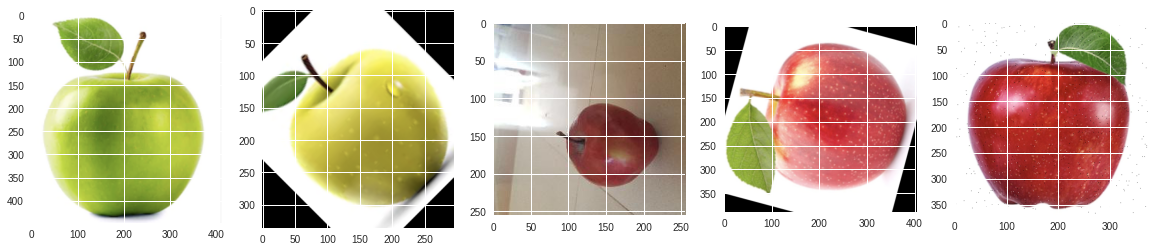

banana


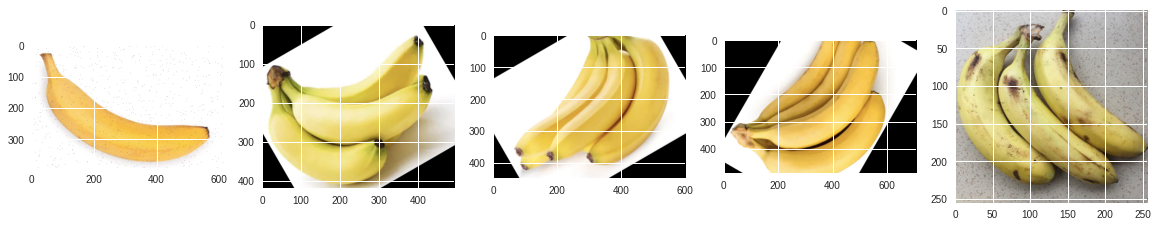

broccoli


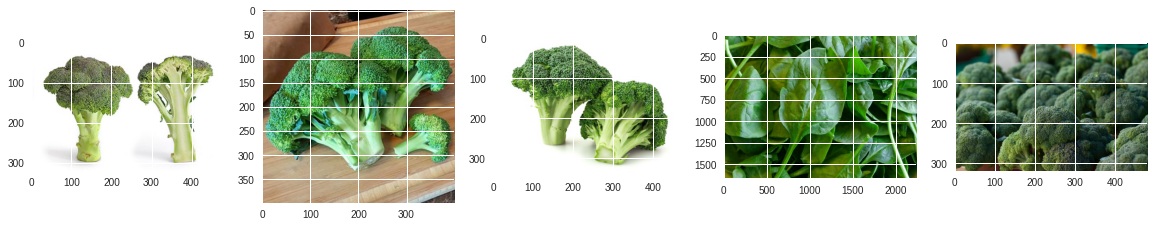

carrot


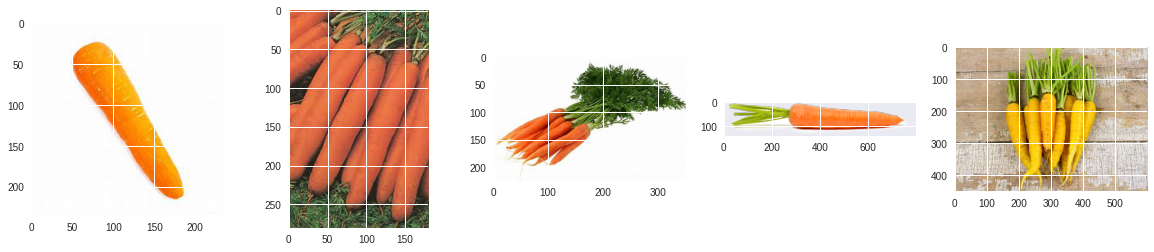

orange


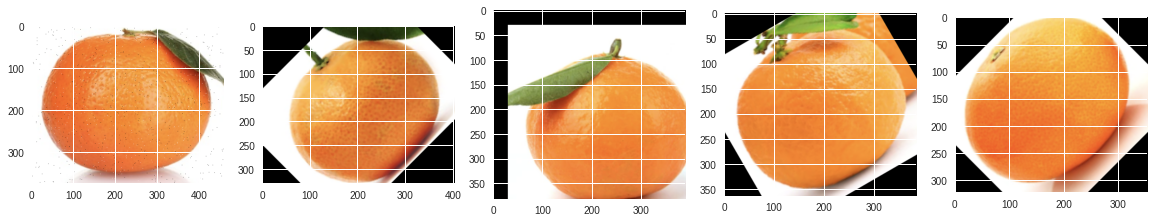

tomato


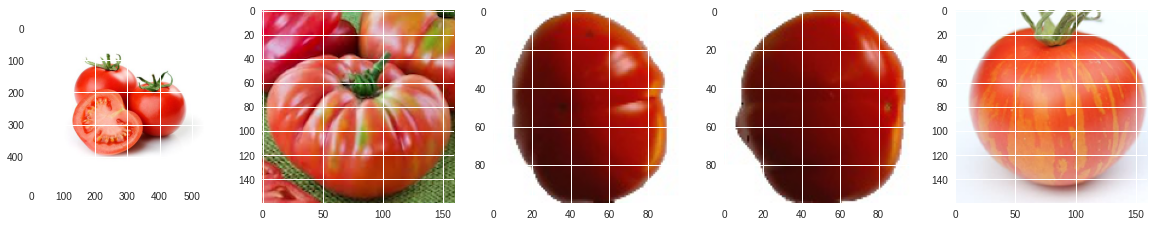

In [ ]:
# check images class
for  item in list_category:
  print(item)
  class_dir = os.path.join(dir,item)
  class_images = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.imshow(img)
  plt.show()

## **Preprocessing Image**

Decode Image
1. Normalized, so the range value is 0-1
1. Resized to desired dimension (256 x 256)

Image will be augmented:
1. Random flip left or right
1. Random flip up or down
1. Random brightness
1. Random contrast

In [ ]:
dim = 150

def decode_image(filename, label=None, image_size=(dim, dim)):
    """
    Decode, normalize, and resize the image

    Parameters
    ----------
    filename: str
        The image file's name
    label: int, optional
        The image's label (default is None)
    image_size: tuple of int, optional
        The image's size. (default is (256, 256))

    Returns
    -------
    image:
        Decoded image
    label: optional
        One-hot encoded label
    """

    bits = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(bits, channels=3)
    image = tf.cast(image, tf.float32)  # Convert to float32
    image /= 255.0  # Normalize
    image = tf.image.resize(image, image_size)  #Resize
    
    if label == None:
        return image
    else:
        return image, tf.one_hot(label, depth=len(list_category))

def image_augment(image, label=None):
    """
    Augment the image.
    The image will randomly flip left, right, up, or down
    The image will be given random brightness and contrast

    Parameters
    ----------
    image: tf.image
        The image
    label: list, optional
        One-hot encoded label (default is None)

    Returns
    -------
    image:
        Augmented image
    label: optional
        One-hot encoded label
    """

    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, 0.2)
    image = tf.image.random_contrast(image, lower = 0.3, upper = 0.9)

    if label == None:
        return image
    else: 
        return image, label

# **Image Augmentation**

**Parallelizing data loading**

The prefetch transformation prefetches elements from the input dataset ahead of time. 

The number of items to prefetch should be equal to (or possibly higher than) the number of batches consumed by a single training step

In [ ]:
AUTO = tf.data.experimental.AUTOTUNE
batch_size = 128

train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((train_df['image'], train_df['target']))
    .map(decode_image, num_parallel_calls=AUTO)
    .map(image_augment, num_parallel_calls=AUTO)
    .repeat()
    .shuffle(512)
    .batch(batch_size)
    .prefetch(AUTO)
)

val_dataset = (
    tf.data.Dataset
    .from_tensor_slices((val_df['image'], val_df['target']))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(batch_size)
    .cache()
    .prefetch(AUTO)
)

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices((test_df['image'], test_df['target']))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(batch_size)
    .cache()
    .prefetch(AUTO)
)

In [ ]:
for img, label in train_dataset.take(1):
    print("Image shape: {}".format(img.numpy().shape))
    print("Label shape: {}".format(label.numpy().shape))

Image shape: (128, 150, 150, 3)
Label shape: (128, 6)


In [ ]:
def plot_dataset(dataset, rows, cols):
    """
    Plot dataset

    Parameters
    ----------
    dataset: tf.data.Dataset
        Dataset that has been processed
    rows: int
        Number of rows in plot
    cols: int 
        Number of columns in plot
    """
    for img, label in train_dataset.take(1):
        for i in range(rows*cols):
            ax = plt.subplot(rows, cols, i+1)
            plt.imshow(img[i].numpy())

            # Set the title's color
            if list_category[np.argmax(label[i].numpy())] == 'apple':
                color = 'red'
            elif list_category[np.argmax(label[i].numpy())] == 'banana':
                color = 'yellow'
            elif list_category[np.argmax(label[i].numpy())] == 'broccoli':
                color = 'green'
            elif list_category[np.argmax(label[i].numpy())] == 'carrot':
                color = 'orange'
            elif list_category[np.argmax(label[i].numpy())] == 'orange':
                color = 'orange'
            elif list_category[np.argmax(label[i].numpy())] == 'tomato':
                color = 'red'

            plt.title(list_category[np.argmax(label[i].numpy())], color=color)
            plt.axis('off')
            plt.grid(False)

        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


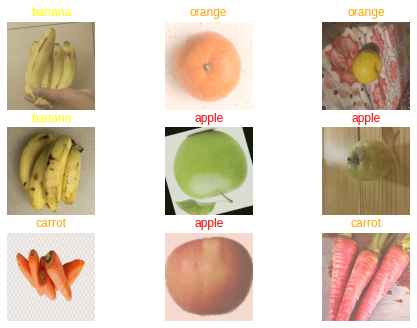

In [ ]:
plot_dataset(train_dataset, 3, 3)

In [ ]:
label_types = []
for category in list_category:
  label_types.append(category)
label_types

['apple', 'banana', 'broccoli', 'carrot', 'orange', 'tomato']

# **Data Modeling 01**

## **Train Model 01**

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(dim, dim, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(len(list_category), activation='softmax')  
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0

In [ ]:
do_fine_tuning = False #@param {type:"boolean"}

if do_fine_tuning:
    optimizer = tf.keras.optimizers.SGD(lr=0.002, momentum=0.9)
else:
    optimizer = "RMSprop"

model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_3_v1.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# fitting model
history = model.fit(
    train_dataset,
    steps_per_epoch = len(train_df) // batch_size,
    epochs = 50,
    validation_data = val_dataset,
    validation_steps = len(val_df) // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/50
69/69 [==============================] - 88s 793ms/step - loss: 2.1359 - accuracy: 0.3723 - val_loss: 1.4019 - val_accuracy: 0.3997

Epoch 00001: val_accuracy improved from -inf to 0.39974, saving model to best_model_3_v1.h5
Epoch 2/50
69/69 [==============================] - 38s 563ms/step - loss: 1.2108 - accuracy: 0.5427 - val_loss: 0.8692 - val_accuracy: 0.6836

Epoch 00002: val_accuracy improved from 0.39974 to 0.68359, saving model to best_model_3_v1.h5
Epoch 3/50
69/69 [==============================] - 52s 757ms/step - loss: 0.8653 - accuracy: 0.6887 - val_loss: 1.0673 - val_accuracy: 0.5658

Epoch 00003: val_accuracy did not improve from 0.68359
Epoch 4/50
69/69 [==============================] - 58s 845ms/step - loss: 0.6165 - accuracy: 0.7797 - val_loss: 0.4401 - val_accuracy: 0.8470

Epoch 00004: val_accuracy improved from 0.68359 to 0.84701, saving model to best_model_3_v1.h5
Epoch 5/50
69/69 [==============================] - 60s 883ms/step - loss: 0.5049 - acc

In [ ]:
score_valid = model.evaluate(test_dataset, return_dict=True, verbose=0)

print(score_valid)

{'loss': 0.11128761619329453, 'accuracy': 0.9675675630569458}


### **Plot Model**

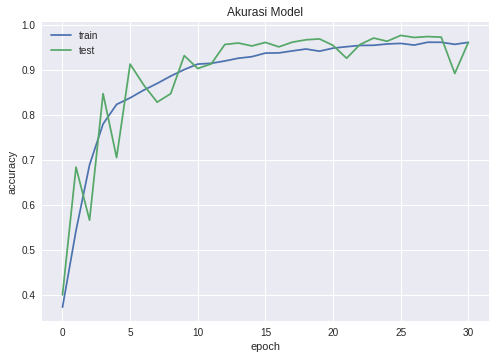

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

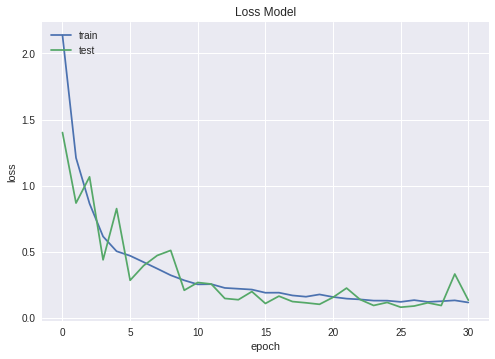

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

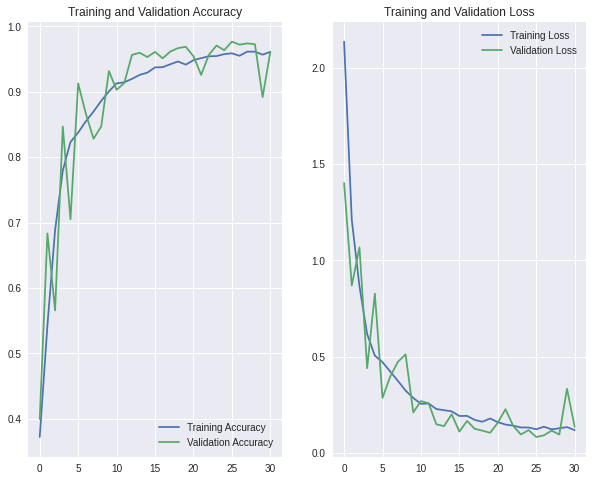

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving apple.jpg to apple.jpg
Apple


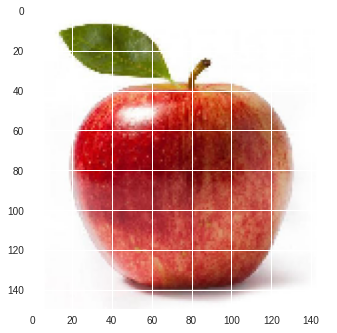

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(dim,dim))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [ ]:
classes

array([[9.8176736e-01, 8.5409475e-15, 7.7988848e-12, 8.6462020e-09,
        2.8489291e-07, 1.8232323e-02]], dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 232
drwxr-xr-x 2 root root   4096 Jun  3 00:06 assets
-rw-r--r-- 1 root root  22143 Jun  3 00:06 keras_metadata.pb
-rw-r--r-- 1 root root 203040 Jun  3 00:06 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  3 00:06 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_03_v1.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_03_v1.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_03_v1.tflite')
    files.download('fruitsvegetable_03_v1.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_3_v1.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 232
drwxr-xr-x 2 root root   4096 Jun  3 00:06 assets
-rw-r--r-- 1 root root  22143 Jun  3 00:06 keras_metadata.pb
-rw-r--r-- 1 root root 201673 Jun  3 00:06 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  3 00:06 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_03_v1_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_03_v1_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_03_v1_best.tflite')
    files.download('fruitsvegetable_03_v1_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 02**

In [ ]:
import tensorflow as tf
# from tensorflow.keras import applications, optimizers

tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(dim, dim, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(list_category), activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_3_v2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# fitting model
history = model.fit(
    train_dataset,
    steps_per_epoch = len(train_df) // batch_size,
    epochs = 50,
    validation_data = val_dataset,
    validation_steps = len(val_df) // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/50
69/69 [==============================] - 42s 558ms/step - loss: 0.9946 - accuracy: 0.6129 - val_loss: 0.5135 - val_accuracy: 0.8151

Epoch 00001: val_accuracy improved from -inf to 0.81510, saving model to best_model_3_v2.h5
Epoch 2/50
69/69 [==============================] - 39s 567ms/step - loss: 0.5244 - accuracy: 0.8188 - val_loss: 0.3132 - val_accuracy: 0.8952

Epoch 00002: val_accuracy improved from 0.81510 to 0.89518, saving model to best_model_3_v2.h5
Epoch 3/50
69/69 [==============================] - 41s 596ms/step - loss: 0.3633 - accuracy: 0.8749 - val_loss: 0.4260 - val_accuracy: 0.8496

Epoch 00003: val_accuracy did not improve from 0.89518
Epoch 4/50
69/69 [==============================] - 37s 547ms/step - loss: 0.3285 - accuracy: 0.8871 - val_loss: 0.2557 - val_accuracy: 0.9147

Epoch 00004: val_accuracy improved from 0.89518 to 0.91471, saving model to best_model_3_v2.h5
Epoch 5/50
69/69 [==============================] - 37s 548ms/step - loss: 0.2557 - acc

In [ ]:
score_valid = model.evaluate(test_dataset, return_dict=True, verbose=0)

print(score_valid)

{'loss': 0.05698098987340927, 'accuracy': 0.9819819927215576}


### **Plot Model**

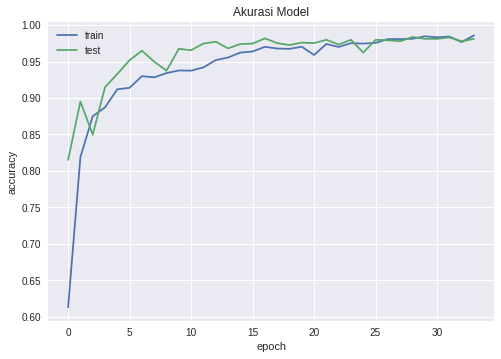

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

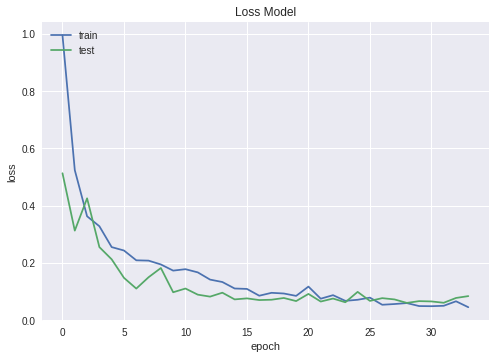

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

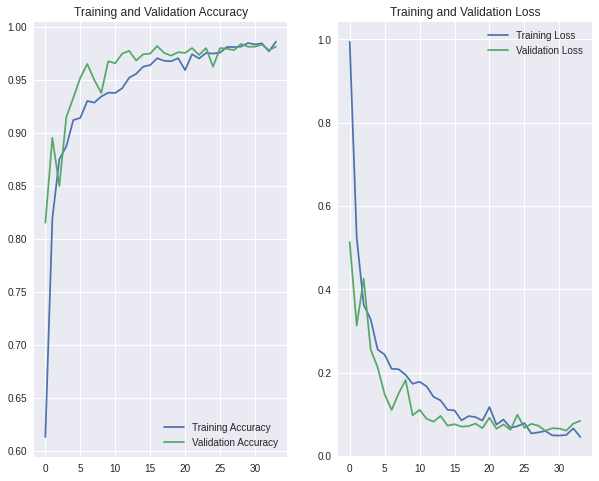

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving broccoli.jpg to broccoli.jpg
Broccoli


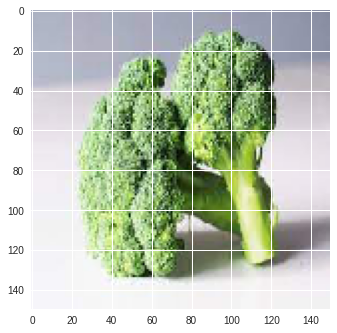

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(dim,dim))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [ ]:
classes

array([[2.8090400e-11, 2.9777848e-21, 1.0000000e+00, 1.1787944e-10,
        2.0252905e-19, 5.9087125e-08]], dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 244
drwxr-xr-x 2 root root   4096 Jun  3 00:39 assets
-rw-r--r-- 1 root root  23532 Jun  3 00:39 keras_metadata.pb
-rw-r--r-- 1 root root 215869 Jun  3 00:39 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  3 00:39 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_03_v2.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_03_v2.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_03_v2.tflite')
    files.download('fruitsvegetable_03_v2.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**


In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_3_v2.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 244
drwxr-xr-x 2 root root   4096 Jun  3 00:39 assets
-rw-r--r-- 1 root root  23532 Jun  3 00:39 keras_metadata.pb
-rw-r--r-- 1 root root 214109 Jun  3 00:39 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  3 00:39 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_03_v2_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_03_v2_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_03_v2_best.tflite')
    files.download('fruitsvegetable_03_v2_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 03**

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(dim, dim, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(len(list_category), activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)       

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_3_v3.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# history = model.fit(train_dataset,
#                               validation_data=val_dataset,
#                               steps_per_epoch=100,
#                               epochs=15,
#                               validation_steps=50,
#                               verbose=2)

In [ ]:
# fitting model
history = model.fit(
    train_dataset,
    steps_per_epoch = len(train_df) // batch_size,
    epochs = 50,
    validation_data = val_dataset,
    validation_steps = len(val_df) // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/50
69/69 [==============================] - 42s 558ms/step - loss: 1.3526 - accuracy: 0.4580 - val_loss: 1.0124 - val_accuracy: 0.6172

Epoch 00001: val_accuracy improved from -inf to 0.61719, saving model to best_model_3_v3.h5
Epoch 2/50
69/69 [==============================] - 58s 844ms/step - loss: 0.9634 - accuracy: 0.6359 - val_loss: 0.5356 - val_accuracy: 0.8092

Epoch 00002: val_accuracy improved from 0.61719 to 0.80924, saving model to best_model_3_v3.h5
Epoch 3/50
69/69 [==============================] - 46s 671ms/step - loss: 0.7335 - accuracy: 0.7331 - val_loss: 0.4510 - val_accuracy: 0.8262

Epoch 00003: val_accuracy improved from 0.80924 to 0.82617, saving model to best_model_3_v3.h5
Epoch 4/50
69/69 [==============================] - 79s 1s/step - loss: 0.6195 - accuracy: 0.7751 - val_loss: 0.3960 - val_accuracy: 0.8783

Epoch 00004: val_accuracy improved from 0.82617 to 0.87826, saving model to best_model_3_v3.h5
Epoch 5/50
69/69 [==============================] 

In [ ]:
score_valid = model.evaluate(test_dataset, return_dict=True, verbose=0)

print(score_valid)

{'loss': 0.2656105160713196, 'accuracy': 0.9261261224746704}


### **Plot Model**

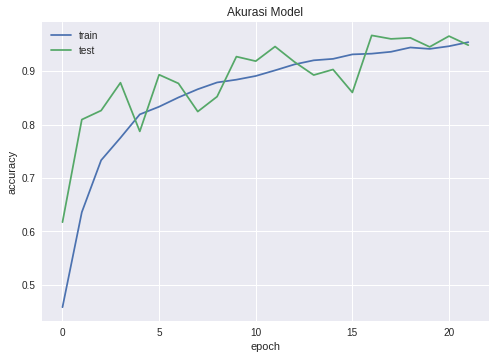

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

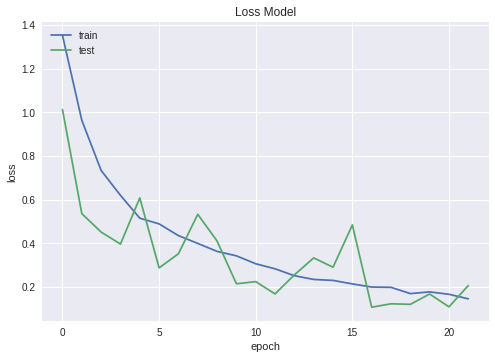

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

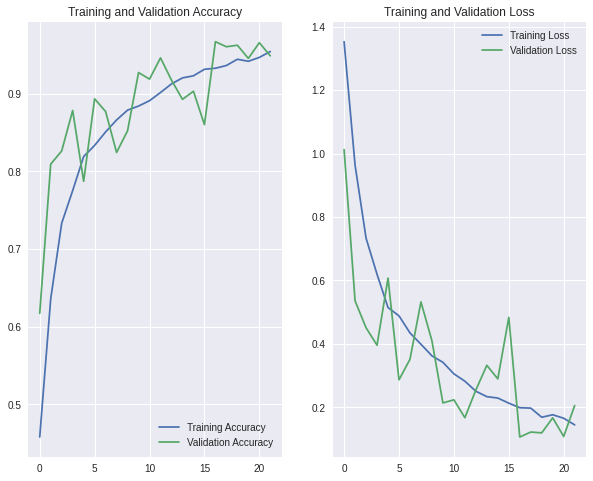

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving broccoli.jpg to broccoli (1).jpg
Broccoli


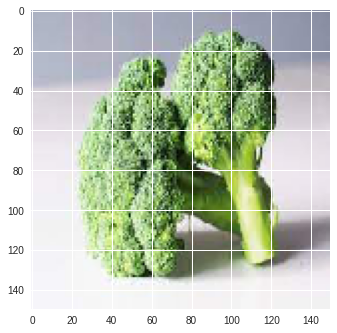

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(dim,dim))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [ ]:
classes

array([[3.4696811e-07, 4.4999383e-13, 9.9999619e-01, 1.0058035e-06,
        2.6135958e-09, 2.4513918e-06]], dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 252
drwxr-xr-x 2 root root   4096 Jun  3 01:01 assets
-rw-r--r-- 1 root root  26746 Jun  3 01:01 keras_metadata.pb
-rw-r--r-- 1 root root 217445 Jun  3 01:01 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  3 01:01 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_03_v3.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_03_v3.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_03_v3.tflite')
    files.download('fruitsvegetable_03_v3.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_3_v3.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 248
drwxr-xr-x 2 root root   4096 Jun  3 01:01 assets
-rw-r--r-- 1 root root  26746 Jun  3 01:01 keras_metadata.pb
-rw-r--r-- 1 root root 215582 Jun  3 01:01 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  3 01:01 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_03_v3_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_03_v3_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_03_v3_best.tflite')
    files.download('fruitsvegetable_03_v3_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 04**

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2

tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(dim, dim, 3))),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(list_category), activation='softmax')  
])
model.layers[0].trainable = False

234553344/234545216 [==============================] - 2s 0us/step


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 5, 5, 2048)        58331648  
_________________________________________________________________
flatten_3 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               26214912  
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 1542      
Total params: 84,679,430
Trainable params: 26,347,782
Non-trainable params: 58,331,648
_________________________________

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_3_v4.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# history = model.fit(train_dataset,
#                               validation_data=val_dataset,
#                               steps_per_epoch=100,
#                               epochs=15,
#                               validation_steps=50,
#                               verbose=2)

In [ ]:
# fitting model
history = model.fit(
    train_dataset,
    steps_per_epoch = len(train_df) // batch_size,
    epochs = 50,
    validation_data = val_dataset,
    validation_steps = len(val_df) // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/50
69/69 [==============================] - 60s 700ms/step - loss: 3.1043 - accuracy: 0.8781 - val_loss: 0.1306 - val_accuracy: 0.9772

Epoch 00001: val_accuracy improved from -inf to 0.97721, saving model to best_model_3_v4.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
69/69 [==============================] - 43s 625ms/step - loss: 0.4333 - accuracy: 0.9451 - val_loss: 0.1624 - val_accuracy: 0.9727

Epoch 00002: val_accuracy did not improve from 0.97721
Epoch 3/50
69/69 [==============================] - 42s 603ms/step - loss: 0.2244 - accuracy: 0.9612 - val_loss: 0.1733 - val_accuracy: 0.9740

Epoch 00003: val_accuracy did not improve from 0.97721
Epoch 4/50
69/69 [==============================] - 41s 599ms/step - loss: 0.1774 - accuracy: 0.9700 - val_loss: 0.2645 - val_accuracy: 0.9564

Epoch 00004: val_accuracy did not improve from 0.97721
Epoch 5/50
69/69 [==============================] - 41s 602ms/step - loss: 0.1514 - accuracy: 0.9725 - val_loss: 0.0885 - val_accuracy: 0.9818

Epoch 00005: val_accuracy improved from 0.97721 to 0.98177, saving model to best_model_3_v4.h5
Epoch 6/50
69/69 [==============================] - 42s 604ms/step - loss: 0.1417 - accuracy: 0.9774 - val_loss: 0.0684 - val_accuracy: 0.9909

Epoch 00006: val_acc

In [ ]:
score_valid = model.evaluate(test_dataset, return_dict=True, verbose=0)

print(score_valid)

{'loss': 0.033163368701934814, 'accuracy': 0.9927927851676941}


### **Plot Model**

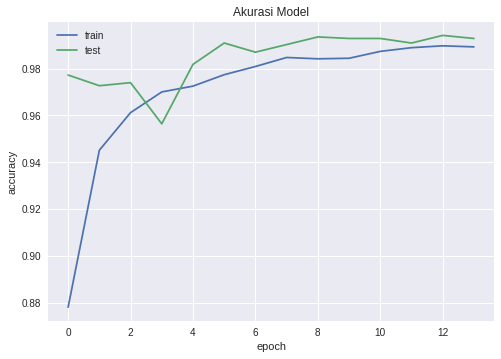

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

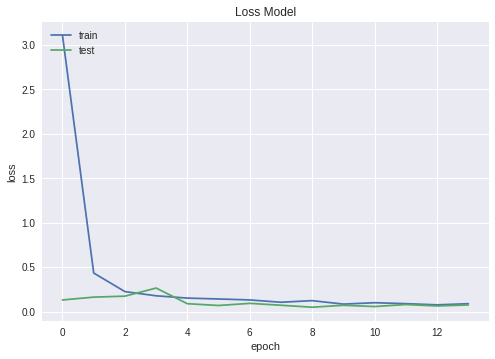

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

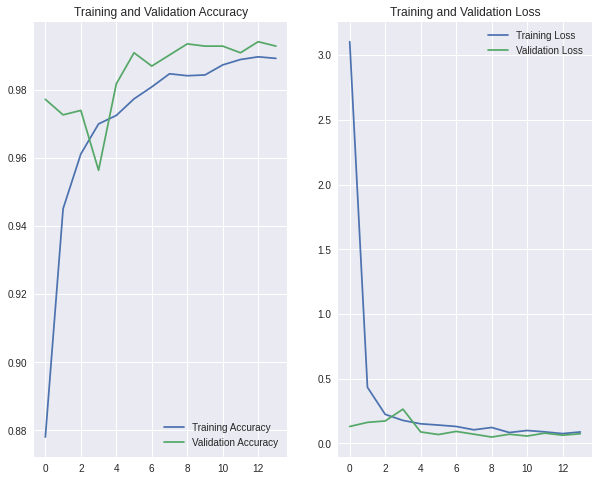

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving carrot.jpg to carrot.jpg
Carrot


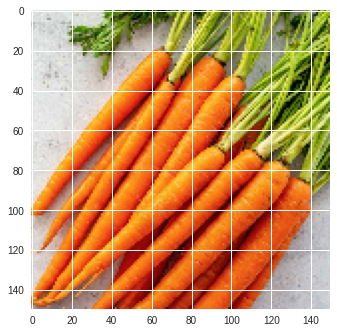

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(dim,dim))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [ ]:
classes

array([[0., 0., 0., 1., 0., 0.]], dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 15192
drwxr-xr-x 2 root root     4096 Jun  3 01:13 assets
-rw-r--r-- 1 root root  1735735 Jun  3 01:13 keras_metadata.pb
-rw-r--r-- 1 root root 13808212 Jun  3 01:13 saved_model.pb
drwxr-xr-x 2 root root     4096 Jun  3 01:13 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_03_v4.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_03_v4.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_03_v4.tflite')
    files.download('fruitsvegetable_03_v4.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_3_v4.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up



/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 15192
drwxr-xr-x 2 root root     4096 Jun  3 01:15 assets
-rw-r--r-- 1 root root  1735734 Jun  3 01:15 keras_metadata.pb
-rw-r--r-- 1 root root 13807976 Jun  3 01:15 saved_model.pb
drwxr-xr-x 2 root root     4096 Jun  3 01:15 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_03_v4_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_03_v4_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_03_v4_best.tflite')
    files.download('fruitsvegetable_03_v4_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 05**

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121

model = tf.keras.Sequential([
    DenseNet121(
        include_top=False,
        weights='imagenet',
        input_shape=(dim, dim, 3)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(len(list_category), activation='softmax')
])

29089792/29084464 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 4, 4, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)              

In [ ]:
do_fine_tuning = True #@param {type:"boolean"}

if do_fine_tuning:
    optimizer = tf.keras.optimizers.SGD(lr=0.002, momentum=0.9)
else:
    optimizer = "adam"

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_3_v5.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# fitting model
history = model.fit(
    train_dataset,
    steps_per_epoch = len(train_df) // batch_size,
    epochs = 50,
    validation_data = val_dataset,
    validation_steps = len(val_df) // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/50
69/69 [==============================] - 82s 845ms/step - loss: 0.7740 - accuracy: 0.7456 - val_loss: 0.1703 - val_accuracy: 0.9492

Epoch 00001: val_accuracy improved from -inf to 0.94922, saving model to best_model_3_v5.h5
Epoch 2/50
69/69 [==============================] - 53s 769ms/step - loss: 0.0929 - accuracy: 0.9753 - val_loss: 0.0416 - val_accuracy: 0.9883

Epoch 00002: val_accuracy improved from 0.94922 to 0.98828, saving model to best_model_3_v5.h5
Epoch 3/50
69/69 [==============================] - 51s 736ms/step - loss: 0.0423 - accuracy: 0.9887 - val_loss: 0.0130 - val_accuracy: 0.9941

Epoch 00003: val_accuracy improved from 0.98828 to 0.99414, saving model to best_model_3_v5.h5
Epoch 4/50
69/69 [==============================] - 51s 737ms/step - loss: 0.0286 - accuracy: 0.9924 - val_loss: 0.0050 - val_accuracy: 0.9987

The accuracy of the training set and the validation set has reached > 99%!

Epoch 00004: val_accuracy improved from 0.99414 to 0.99870, saving

In [ ]:
score_valid = model.evaluate(test_dataset, return_dict=True, verbose=0)

print(score_valid)

{'loss': 0.0019228982273489237, 'accuracy': 1.0}


### **Plot Model**

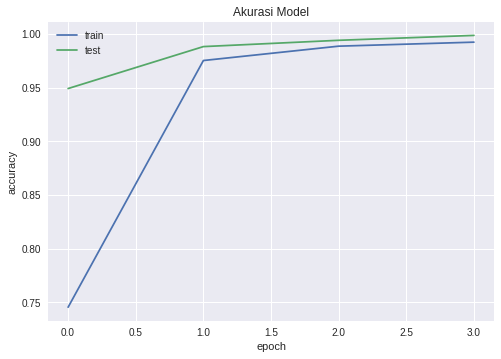

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

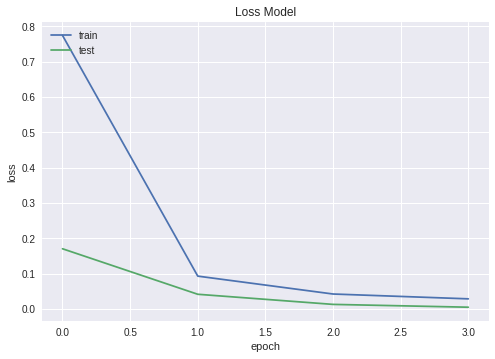

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

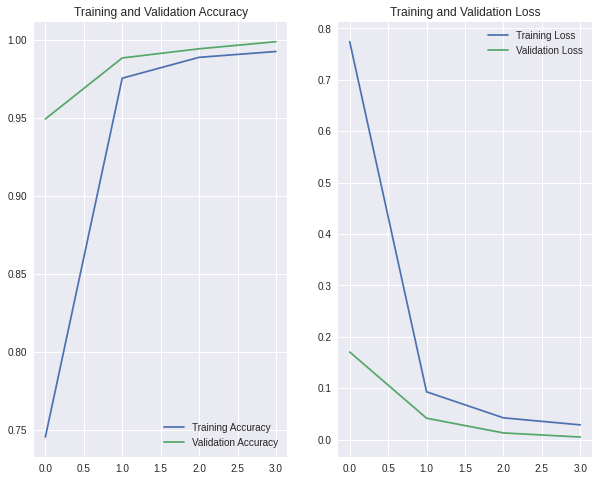

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving orange.jpg to orange.jpg
Orange


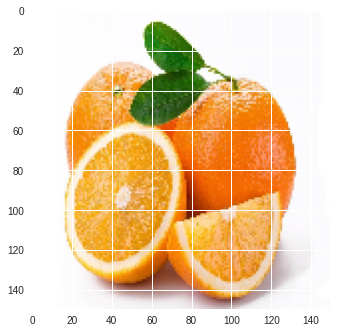

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [ ]:
classes

array([[3.9180244e-07, 8.1555982e-07, 4.8447492e-07, 1.8711780e-05,
        9.9996662e-01, 1.3046618e-05]], dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 12544
drwxr-xr-x 2 root root     4096 Jun  3 01:23 assets
-rw-r--r-- 1 root root  1308111 Jun  3 01:23 keras_metadata.pb
-rw-r--r-- 1 root root 11523831 Jun  3 01:23 saved_model.pb
drwxr-xr-x 2 root root     4096 Jun  3 01:23 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_03_v5.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_03_v5.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_03_v5.tflite')
    files.download('fruitsvegetable_03_v5.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_3_v5.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 12528
drwxr-xr-x 2 root root     4096 Jun  3 01:24 assets
-rw-r--r-- 1 root root  1308111 Jun  3 01:24 keras_metadata.pb
-rw-r--r-- 1 root root 11505764 Jun  3 01:24 saved_model.pb
drwxr-xr-x 2 root root     4096 Jun  3 01:24 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_03_v5_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_03_v5_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_03_v5_best.tflite')
    files.download('fruitsvegetable_03_v5_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 06**

In [ ]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-06-03 01:25:22--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.176, 172.217.2.112, 172.217.164.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   178MB/s    in 0.5s    

2021-06-03 01:25:22 (178 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape=(dim, dim, 3),
                                include_top=False,
                                weights=None)

pre_trained_model.load_weights(local_weights_file)

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_12[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = tf.keras.layers.Dense(len(list_category), activation='softmax')(x) 

model = tf.keras.Model(pre_trained_model.input, x)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d_12[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# Fine Tuning
NUM_LAYERS = 10 #@param {type:"slider", min:1, max:50, step:1}
do_fine_tuning = True #@param {type:"boolean"}

if do_fine_tuning:
    optimizer = tf.keras.optimizers.SGD(lr=0.002, momentum=0.9)
    
    for layer in model.layers[-NUM_LAYERS:]:
        layer.trainable = True

    # Make all the layers in the pre-trained model trainable
    for layer in pre_trained_model.layers:
        layer.trainable = True
else:
    optimizer = 'adam'

    # Make all the layers in the pre-trained model non-trainable
    for layer in pre_trained_model.layers:
        layer.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_3_v6.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# fitting model
history = model.fit(
    train_dataset,
    steps_per_epoch = len(train_df) // batch_size,
    epochs = 50,
    validation_data = val_dataset,
    validation_steps = len(val_df) // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/50
69/69 [==============================] - 55s 619ms/step - loss: 0.5451 - accuracy: 0.8295 - val_loss: 0.1538 - val_accuracy: 0.9531

Epoch 00001: val_accuracy improved from -inf to 0.95312, saving model to best_model_3_v6.h5
Epoch 2/50
69/69 [==============================] - 41s 591ms/step - loss: 0.0733 - accuracy: 0.9826 - val_loss: 0.0389 - val_accuracy: 0.9909

Epoch 00002: val_accuracy improved from 0.95312 to 0.99089, saving model to best_model_3_v6.h5
Epoch 3/50
69/69 [==============================] - 39s 569ms/step - loss: 0.0371 - accuracy: 0.9912 - val_loss: 0.0184 - val_accuracy: 0.9967

The accuracy of the training set and the validation set has reached > 99%!

Epoch 00003: val_accuracy improved from 0.99089 to 0.99674, saving model to best_model_3_v6.h5


In [ ]:
score_valid = model.evaluate(test_dataset, return_dict=True, verbose=0)

print(score_valid)

{'loss': 0.022618241608142853, 'accuracy': 0.9963964223861694}


### **Plot Model**

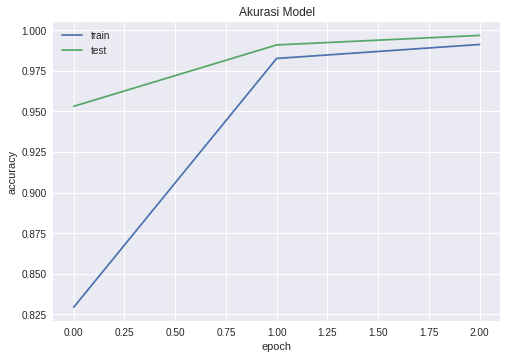

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

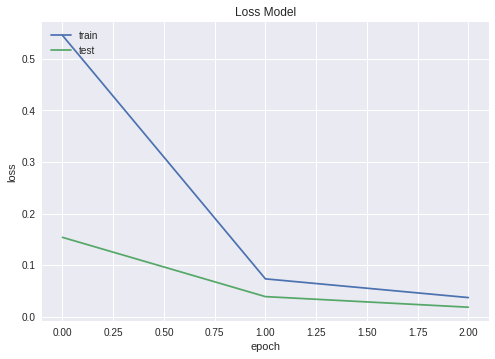

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

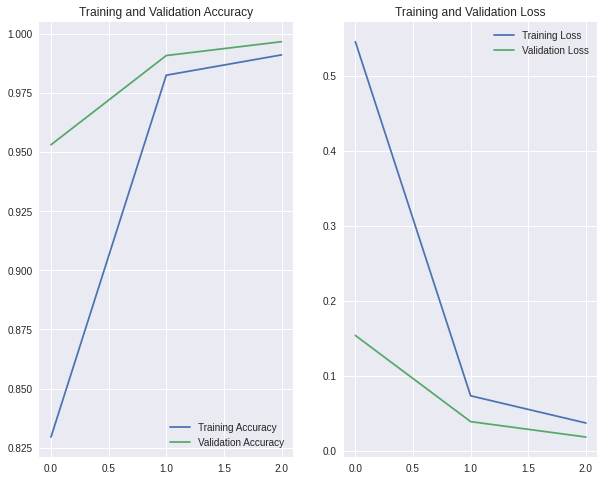

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving tomato.jpg to tomato.jpg
Tomato


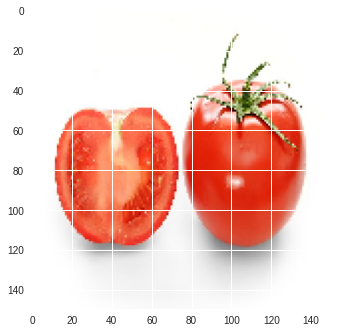

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [ ]:
classes

array([[0.32959032, 0.00059356, 0.00105525, 0.02131165, 0.16595948,
        0.48148975]], dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 5380
drwxr-xr-x 2 root root    4096 Jun  3 01:40 assets
-rw-r--r-- 1 root root  480157 Jun  3 01:40 keras_metadata.pb
-rw-r--r-- 1 root root 5016571 Jun  3 01:40 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  3 01:40 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_03_v6.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_03_v6.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_03_v6.tflite')
    files.download('fruitsvegetable_03_v6.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_3_v6.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 5380
drwxr-xr-x 2 root root    4096 Jun  3 01:41 assets
-rw-r--r-- 1 root root  480157 Jun  3 01:41 keras_metadata.pb
-rw-r--r-- 1 root root 5016804 Jun  3 01:41 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  3 01:41 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_03_v6_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_03_v6_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_03_v6_best.tflite')
    files.download('fruitsvegetable_03_v6_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 07**

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import VGG19

model = tf.keras.models.Sequential([
    VGG19(weights="imagenet", include_top=False, input_tensor=Input(shape=(dim, dim, 3))),
    # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])
model.layers[0].trainable = False

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 1542      
Total params: 24,352,070
Trainable params: 4,327,686
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_3_v7.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# history = model.fit(train_dataset,
#                               validation_data=val_dataset,
#                               steps_per_epoch=100,
#                               epochs=15,
#                               validation_steps=50,
#                               verbose=2)

In [ ]:
# fitting model
history = model.fit(
    train_dataset,
    steps_per_epoch = len(train_df) // batch_size,
    epochs = 50,
    validation_data = val_dataset,
    validation_steps = len(val_df) // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/50
69/69 [==============================] - 82s 586ms/step - loss: 1.8401 - accuracy: 0.5665 - val_loss: 0.5974 - val_accuracy: 0.7324

Epoch 00001: val_accuracy improved from -inf to 0.73242, saving model to best_model_3_v7.h5
Epoch 2/50
69/69 [==============================] - 40s 579ms/step - loss: 0.6095 - accuracy: 0.7508 - val_loss: 0.3250 - val_accuracy: 0.8815

Epoch 00002: val_accuracy improved from 0.73242 to 0.88151, saving model to best_model_3_v7.h5
Epoch 3/50
69/69 [==============================] - 39s 570ms/step - loss: 0.4648 - accuracy: 0.8142 - val_loss: 0.2047 - val_accuracy: 0.9310

Epoch 00003: val_accuracy improved from 0.88151 to 0.93099, saving model to best_model_3_v7.h5
Epoch 4/50
69/69 [==============================] - 38s 556ms/step - loss: 0.3646 - accuracy: 0.8630 - val_loss: 0.1644 - val_accuracy: 0.9466

Epoch 00004: val_accuracy improved from 0.93099 to 0.94661, saving model to best_model_3_v7.h5
Epoch 5/50
69/69 [=============================

In [ ]:
score_valid = model.evaluate(test_dataset, return_dict=True, verbose=0)

print(score_valid)

{'loss': 0.0882859155535698, 'accuracy': 0.9801802039146423}


### **Plot Model**

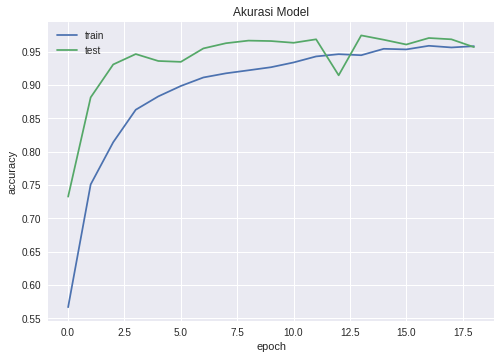

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

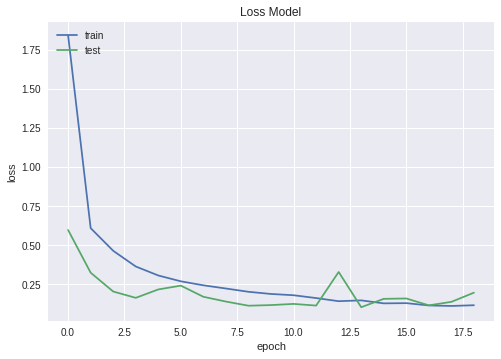

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

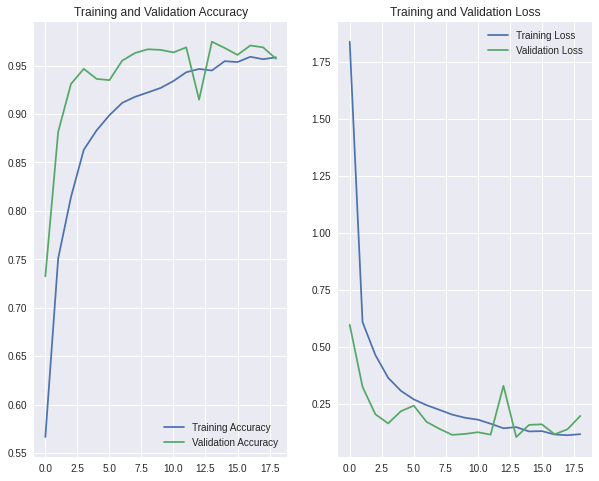

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving orange.jpg to orange.jpg
Orange


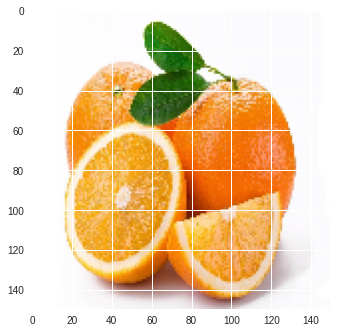

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size=32) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [ ]:
classes

array([[5.4812399e-03, 2.0825864e-06, 3.6073670e-05, 2.1097767e-03,
        9.8746663e-01, 4.9042697e-03]], dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 632
drwxr-xr-x 2 root root   4096 Jun  3 02:57 assets
-rw-r--r-- 1 root root  92559 Jun  3 02:57 keras_metadata.pb
-rw-r--r-- 1 root root 542958 Jun  3 02:57 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  3 02:57 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_03_v7.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_03_v7.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_03_v7.tflite')
    files.download('fruitsvegetable_03_v7.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_3_v7.h5')

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

INFO:tensorflow:Assets written to: /tmp/2/assets

export_path = /tmp/2
total 632
drwxr-xr-x 2 root root   4096 Jun  3 02:57 assets
-rw-r--r-- 1 root root  92558 Jun  3 02:57 keras_metadata.pb
-rw-r--r-- 1 root root 542797 Jun  3 02:57 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  3 02:57 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_03_v7_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_03_v7_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_03_v7_best.tflite')
    files.download('fruitsvegetable_03_v7_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Train Model 08**

In [ ]:
module_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/tf2-preview/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {} and output dimension {}".format(MODULE_HANDLE, IMAGE_SIZE, FV_SIZE))

Using https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with input size (224, 224) and output dimension 1280


In [ ]:
dim = pixels

def decode_image(filename, label=None, image_size=(dim, dim)):
    bits = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(bits, channels=3)
    image = tf.cast(image, tf.float32)  # Convert to float32
    image /= 255.0  # Normalize
    image = tf.image.resize(image, image_size)  #Resize
    
    if label == None:
        return image
    else:
        return image, tf.one_hot(label, depth=len(list_category))

def image_augment(image, label=None):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, 0.2)
    image = tf.image.random_contrast(image, lower = 0.3, upper = 0.9)

    if label == None:
        return image
    else: 
        return image, label

In [ ]:
AUTO = tf.data.experimental.AUTOTUNE
batch_size = 128

train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((train_df['image'], train_df['target']))
    .map(decode_image, num_parallel_calls=AUTO)
    .map(image_augment, num_parallel_calls=AUTO)
    .repeat()
    .shuffle(512)
    .batch(batch_size)
    .prefetch(AUTO)
)

val_dataset = (
    tf.data.Dataset
    .from_tensor_slices((val_df['image'], val_df['target']))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(batch_size)
    .cache()
    .prefetch(AUTO)
)

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices((test_df['image'], test_df['target']))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(batch_size)
    .cache()
    .prefetch(AUTO)
)

In [ ]:
import tensorflow_hub as hub
do_fine_tuning = True #@param {type:"boolean"}

feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE + (3,), 
                                   output_shape=[FV_SIZE],
                                   trainable=do_fine_tuning)

model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(len(list_category), activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_3 (Dense)              (None, 256)               327936    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 1542      
Total params: 2,587,462
Trainable params: 2,553,350
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
if do_fine_tuning:
    optimizer = tf.keras.optimizers.SGD(lr=0.002, momentum=0.9)
    feature_extractor.trainable = True
else: 
    feature_extractor.trainable = False
    optimizer = "adam"

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99%!")
callbacks = myCallback()

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
mc = ModelCheckpoint('best_model_3_v8.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# fitting model
history = model.fit(
    train_dataset,
    steps_per_epoch = len(train_df) // batch_size,
    epochs = 50,
    validation_data = val_dataset,
    validation_steps = len(val_df) // batch_size,
    verbose = 1,
    callbacks=[callbacks, es, mc]
)

Epoch 1/50
 6/69 [=>............................] - ETA: 52s - loss: 2.6319 - accuracy: 0.2057WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.2052s vs `on_train_batch_end` time: 0.5192s). Check your callbacks.


69/69 [==============================] - 78s 934ms/step - loss: 0.9615 - accuracy: 0.8440 - val_loss: 0.5708 - val_accuracy: 0.9844

Epoch 00001: val_accuracy improved from -inf to 0.98438, saving model to best_model_3_v8.h5
Epoch 2/50
69/69 [==============================] - 63s 919ms/step - loss: 0.5472 - accuracy: 0.9900 - val_loss: 0.5193 - val_accuracy: 0.9987

The accuracy of the training set and the validation set has reached > 99%!

Epoch 00002: val_accuracy improved from 0.98438 to 0.99870, saving model to best_model_3_v8.h5


In [ ]:
score_valid = model.evaluate(test_dataset, return_dict=True, verbose=0)

print(score_valid)

{'loss': 0.5315656661987305, 'accuracy': 0.9945945739746094}


### **Plot Model**

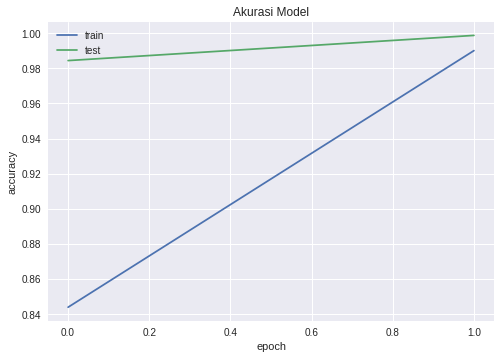

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

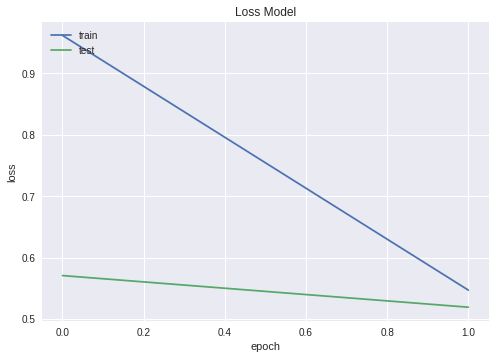

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

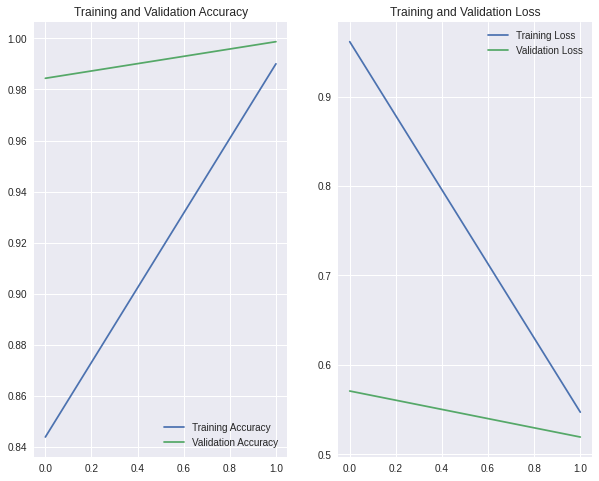

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs_range   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### **Predict and Evaluate Model**

Saving apple.jpg to apple.jpg
Apple


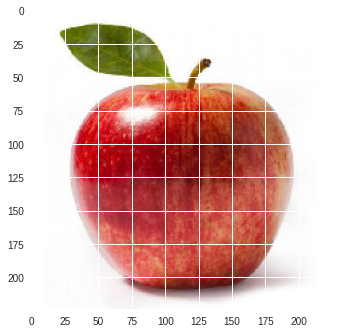

In [ ]:
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for path in uploaded.keys():
  img = image.load_img(path, target_size=IMAGE_SIZE)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  images /= 255 # because on train and test image is normalized, on image predict supposed to be too.
  classes = model.predict(images, batch_size) # the value is not always 1 and 0 because of probabilities
  predicted_class_indices=np.argmax(classes) # use to check prediction that have higher probabilities

if predicted_class_indices == 0:
    print('Apple')
elif predicted_class_indices == 1:
  print('Banana')
elif predicted_class_indices == 2:
  print('Broccoli')
elif predicted_class_indices == 3:
  print('Carrot')
elif predicted_class_indices == 4:
  print('Orange')
else:
  print('Tomato')

In [ ]:
classes

array([[9.9603772e-01, 2.1499347e-05, 5.2304411e-05, 1.1393835e-04,
        8.5803040e-04, 2.9164487e-03]], dtype=float32)

### **Save Model**

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets


INFO:tensorflow:Assets written to: /tmp/1/assets



export_path = /tmp/1
total 2740
drwxr-xr-x 2 root root    4096 Jun  3 03:02 assets
-rw-r--r-- 1 root root    8029 Jun  3 03:02 keras_metadata.pb
-rw-r--r-- 1 root root 2787222 Jun  3 03:02 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  3 03:02 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_03_v8.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_03_v8.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_03_v8.tflite')
    files.download('fruitsvegetable_03_v8.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Save Model for best_model.h5**

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model_3_v8.h5', custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 2

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

saved_model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up



INFO:tensorflow:Assets written to: /tmp/2/assets


INFO:tensorflow:Assets written to: /tmp/2/assets



export_path = /tmp/2
total 2080
drwxr-xr-x 2 root root    4096 Jun  3 03:09 assets
-rw-r--r-- 1 root root    5613 Jun  3 03:09 keras_metadata.pb
-rw-r--r-- 1 root root 2110753 Jun  3 03:09 saved_model.pb
drwxr-xr-x 2 root root    4096 Jun  3 03:09 variables


In [ ]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'fruitsvegetable_03_v8_best.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('fruitsvegetable_03_v8_best.txt', 'w') as f:
    f.write('\n'.join(label_types))

In [ ]:
try:
    files.download('fruitsvegetable_03_v8_best.tflite')
    files.download('fruitsvegetable_03_v8_best.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>